The Lighting area working within our Unity Editor tribe is hoping to better understand how Creators use their products and features, and have come to you for help. Your task is to help the team validate or refine their questions of interest, explore relevant datasets at our disposal, ask clarifying questions as you progress, and report the main findings and insights back to them at the end. Your primary contacts are the Product Manager (PM) and the Engineering Manager (EM) of Lighting. Both have related, but different questions that are listed below.

Background: What are Lightmaps and Baked Lights in the context of Unity?

YouTube Tutorial: How to build Lightmaps in Unity 2020.1
Official Unity Editor documentation: Light Mode: Baked

https://github.com/cco-data/take-home-exercise-SR-data-analyst


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st 
import statsmodels.api as sm
import json

%matplotlib inline
#check GPU memory, restart 

### Step 1:Explore and describe the information 
contained in the sample dataset made available for download here in simple phrases, including any limitations you wish to highlight. Supporting material is provided in the documentation folder.


In [3]:
lightmap = pd.read_json('data_zipped.json', lines=True)
lightmap.head()

,submit_date,ID,platform,sessionid,blocking,duration,parameters,start,subtype,ts,license
0,2021-10-28,v4/lL/HKf7A4Sqlx13944zkrx+oapLs+npaw9OUTTd4=,WindowsEditor,5314110829103121408,True,122556.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T18:43:26.8774433Z,exitPlayMode,2021-10-28 18:43:27.169 UTC,NaN
1,2021-10-28,yneAbGInS6RdkU+np9wOhJxEq4Xx8ThHdiA4c0sH1Dw=,WindowsEditor,6233676446368430080,True,489308.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T19:38:29.5106919Z,exitPlayMode,2021-10-28 19:38:30.189 UTC,NaN
2,2021-10-28,M5EjWdG90VtOp7sszGIINlbCM62WeqsU8vCNzfDZUs0=,WindowsEditor,2681689864129693184,True,384588.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T19:04:48.6154116Z,exitPlayMode,2021-10-28 19:04:49.077 UTC,NaN
3,2021-10-28,8r87+Merm5DwsC8QaREoAGMpw4nThXoYZBgxROtfTtY=,WindowsEditor,1290270805231924736,True,155529.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T21:45:33.8444707Z,exitPlayMode,2021-10-28 21:45:34.009 UTC,NaN
4,2021-10-28,8r87+Merm5DwsC8QaREoAGMpw4nThXoYZBgxROtfTtY=,WindowsEditor,1290270805231924736,True,113993.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T21:07:52.8860063Z,exitPlayMode,2021-10-28 21:07:53.694 UTC,NaN


In [4]:
lightmap.info()
#no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000100 entries, 0 to 1000099
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   submit_date  1000100 non-null  object 
 1   ID           977937 non-null   object 
 2   platform     1000100 non-null  object 
 3   sessionid    1000100 non-null  int64  
 4   blocking     1000100 non-null  bool   
 5   duration     999957 non-null   float64
 6   parameters   1000100 non-null  object 
 7   start        1000100 non-null  object 
 8   subtype      1000100 non-null  object 
 9   ts           999929 non-null   object 
 10  license      967122 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 77.3+ MB


In [5]:
lightmap['parameters']

0                       {"sourceView":"UnityEditor.Toolbar"}
1                       {"sourceView":"UnityEditor.Toolbar"}
2                       {"sourceView":"UnityEditor.Toolbar"}
3                       {"sourceView":"UnityEditor.Toolbar"}
4                       {"sourceView":"UnityEditor.Toolbar"}
                                 ...                        
1000095    {"autoGenerate":true,"bakeBackend":"progressiv...
1000096    {"autoGenerate":true,"bakeBackend":"progressiv...
1000097    {"autoGenerate":true,"bakeBackend":"progressiv...
1000098    {"autoGenerate":true,"bakeBackend":"progressiv...
1000099    {"autoGenerate":true,"bakeBackend":"progressiv...
Name: parameters, Length: 1000100, dtype: object

In [6]:
#normalize the context in the parameters columns
par = lightmap['parameters'].apply(json.loads)
normed = pd.json_normalize(par)

In [7]:
normed.head()

,sourceView,delayDuration,loadScenesDuration,updateSceneDuration,didCompile,backupScenesDuration,domainReloadDuration,noDomainReload,noSceneReload,sceneCount,...,lights.shadowCastingLightCount,lights.cookieLightCount,lights.uniqueCookieCount,lightProbes.lightProbeGroupCount,lightProbes.lightProbeCount,lightProbes.contributingLightProbeLitInstanceCount,memory.maxTilingModeDuringBake,lightmapCompression,enlighten.finalGather.rayCount,enlighten.finalGather.denoise
0,UnityEditor.Toolbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UnityEditor.Toolbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UnityEditor.Toolbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UnityEditor.Toolbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UnityEditor.Toolbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#join the normalized parameters with original datasets
lightmap_normed = lightmap.join(normed)
lightmap_normed.head()

,submit_date,ID,platform,sessionid,blocking,duration,parameters,start,subtype,ts,...,lights.shadowCastingLightCount,lights.cookieLightCount,lights.uniqueCookieCount,lightProbes.lightProbeGroupCount,lightProbes.lightProbeCount,lightProbes.contributingLightProbeLitInstanceCount,memory.maxTilingModeDuringBake,lightmapCompression,enlighten.finalGather.rayCount,enlighten.finalGather.denoise
0,2021-10-28,v4/lL/HKf7A4Sqlx13944zkrx+oapLs+npaw9OUTTd4=,WindowsEditor,5314110829103121408,True,122556.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T18:43:26.8774433Z,exitPlayMode,2021-10-28 18:43:27.169 UTC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-28,yneAbGInS6RdkU+np9wOhJxEq4Xx8ThHdiA4c0sH1Dw=,WindowsEditor,6233676446368430080,True,489308.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T19:38:29.5106919Z,exitPlayMode,2021-10-28 19:38:30.189 UTC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-28,M5EjWdG90VtOp7sszGIINlbCM62WeqsU8vCNzfDZUs0=,WindowsEditor,2681689864129693184,True,384588.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T19:04:48.6154116Z,exitPlayMode,2021-10-28 19:04:49.077 UTC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-28,8r87+Merm5DwsC8QaREoAGMpw4nThXoYZBgxROtfTtY=,WindowsEditor,1290270805231924736,True,155529.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T21:45:33.8444707Z,exitPlayMode,2021-10-28 21:45:34.009 UTC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-28,8r87+Merm5DwsC8QaREoAGMpw4nThXoYZBgxROtfTtY=,WindowsEditor,1290270805231924736,True,113993.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T21:07:52.8860063Z,exitPlayMode,2021-10-28 21:07:53.694 UTC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


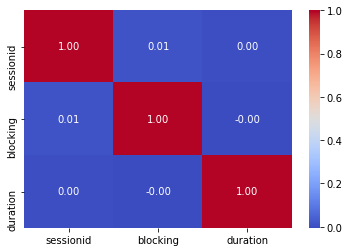

In [8]:
g=sns.heatmap(lightmap.corr(),annot=True ,fmt=".2f", cmap="coolwarm")

### Step 2:Visualise and describe your main findings to the PM.
Questions (sent to you via Slack by the PM)

1. How many Creators are using our Lighting tools?
2. What user insights do we have on them? **
3. How much time do they generally spend on our Lighting tools?
4. Are they satisfied with our current offerings? **

#### 1. How many Creators are using our Lighting tools? 
Ans. If we consider unique id as creator, the total amount of unique id is 75,757

In [11]:
len(lightmap_normed['ID'].unique().tolist())

75757

#### 3. How much time do they generally spend on our Lighting tools?
Ans: On average, each unique creator spend 51,412,056 mins in using the lighting tools

In [14]:
un_creater = lightmap_normed.groupby(by = ['ID']).sum()

In [15]:
un_creater 

,sessionid,blocking,duration,delayDuration,loadScenesDuration,updateSceneDuration,backupScenesDuration,domainReloadDuration,sceneCount,dirtySceneCount,...,lights.mixedLightCount,lights.shadowCastingLightCount,lights.cookieLightCount,lights.uniqueCookieCount,lightProbes.lightProbeGroupCount,lightProbes.lightProbeCount,lightProbes.contributingLightProbeLitInstanceCount,memory.maxTilingModeDuringBake,lightmapCompression,enlighten.finalGather.rayCount
ID,,,,,,,,,,,,,,,,,,,,,
++8caOfHQwlgExyBSbaE83uCff1yqFCMb0CK6vzQVlk=,3.749828e+18,1,222911.0,280794.0,1241926.0,398771.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++DIn+2M59LRUZk8tRmUVUJVsdDKB2W+y5mi12b/VeA=,4.140108e+19,10,10776032.0,1553742.0,2083608.0,18977955.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++FLLtnEaAXUDhIaNrOFnBvwsR1pz02Mk2smZh+6TJ8=,4.554609e+19,6,7924872.0,1406360.0,1497356.0,15307760.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++JrciwHMVyrK8b2bABgyvVDuoXfOKl9kaSvX7f3ZFE=,3.572526e+20,44,66654961.0,22496775.0,35804357.0,131533700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++KLlZP4zixJWTQfLiCk0KP0zOxkFQoihfa5eHRARtY=,1.576950e+18,0,10295484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzr7Ua4xGoMUUlGlOfUZEXQ6E+qzBw++OhMpfPYmU14=,5.698506e+18,1,95410930.0,825352309.0,0.0,21455280.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zzrJqZhSspPyNUmjXfDLjw6E7BaIKrEO+k132BWbUFs=,8.399469e+18,1,2107437.0,211691.0,0.0,2902740.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zzvWng+zR9wTjZw5aMQrQtxYhj+egqsT9nICrSlrBE8=,1.257706e+19,2,403844.0,683853.0,896552.0,783734.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#calculate the duration spend on lighting tools in terms of the unique creaters
un_creater['duration'].mean()

51412056.44032156

In [17]:
#ignore the unique creaters, just calculate the duration
lightmap_normed['duration'].mean()

3963042.924203741

### Step 3: Visualise and describe your main findings to the EM.

Questions (sent to you via Slack by the EM)

1. Do Creators experience any errors when using our Lighting tools?
2. How many Creators use “bakeBackend”?
3. Which version of “bakeBackend” is used the most?
4. How many Creators use the Menu button in the Unity Editor to find our Lighting tools?
5. What is the preferred Lightmap size? **


#### 1. Do Creators experience any errors when using our Lighting tools?
Ans: Though 97.99% are success, there are still interrupted, cancelled and forcestop errors when using lighting tools

In [18]:
outcome_values = lightmap_normed['outcome'].value_counts()
outcome_values

success        95327
interrupted     1577
cancelled        367
forcestop          9
Name: outcome, dtype: int64

In [19]:
#there are lots of na value in the outcome conlumn, so we need to drop those na values before further calculation 
total_outcome = lightmap_normed['outcome'].dropna().count()

<AxesSubplot:>

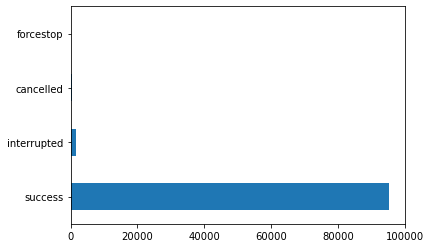

In [20]:
lightmap_normed['outcome'].value_counts().plot(kind='barh')

In [21]:
#calculate the % in each percentage
print('success:',round(outcome_values.loc['success']/total_outcome*100,2))
print('interrupted:',round(outcome_values.loc['interrupted']/total_outcome*100,2))
print('cancelled:',round(outcome_values.loc['cancelled']/total_outcome*100,2))
print('forcestop :',round(outcome_values.loc['forcestop']/total_outcome*100,2))

success: 97.99
interrupted: 1.62
cancelled: 0.38
forcestop : 0.01


#### 2. How many Creators use “bakeBackend”?
Ans: 97,280 creators use "bakeBackend"

In [22]:
lightmap_normed['bakeBackend'].count()

97280

#### 3. Which version of “bakeBackend” is used the most?
Ans: progressivecpu is the version that "bakeBackend" used most

In [23]:
#progressivecpu is used the most
lightmap_normed['bakeBackend'].value_counts()

progressivecpu    69146
enlighten         23831
progressivegpu     4303
Name: bakeBackend, dtype: int64

<AxesSubplot:>

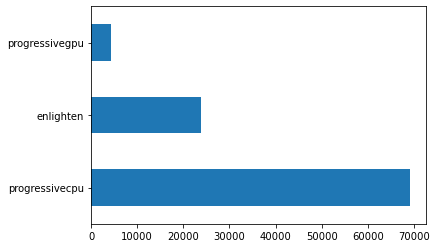

In [24]:
lightmap_normed['bakeBackend'].value_counts().plot(kind='barh')

#### 4. How many Creators use the Menu button in the Unity Editor to find our Lighting tools?
Ans: There are 47 creators who use menu button in the Unity Editor to find the Lighting tools

In [25]:
#check all the rows that contain 'unityEditor' in the sourceView column
lightmap_editor =lightmap_normed.loc[lightmap_normed['sourceView'].str.contains('UnityEditor', case=False, na= False)]

In [26]:
lightmap_editor['sourceView']

0                 UnityEditor.Toolbar
1                 UnityEditor.Toolbar
2                 UnityEditor.Toolbar
3                 UnityEditor.Toolbar
4                 UnityEditor.Toolbar
                      ...            
999810     UnityEditor.ProjectBrowser
999825     UnityEditor.LightingWindow
1000049    UnityEditor.LightingWindow
1000080    UnityEditor.LightingWindow
1000086    UnityEditor.LightingWindow
Name: sourceView, Length: 865015, dtype: object

In [27]:
#further filter the rows contains 'Menu' in their value
lightmap_editor_menu =lightmap_editor.loc[lightmap_editor['sourceView'].str.contains('Menu', case=False, na= False)]

In [28]:
#there is no rows that contains UnityEditor and Menu
lightmap_editor_menu

,submit_date,ID,platform,sessionid,blocking,duration,parameters,start,subtype,ts,...,lights.shadowCastingLightCount,lights.cookieLightCount,lights.uniqueCookieCount,lightProbes.lightProbeGroupCount,lightProbes.lightProbeCount,lightProbes.contributingLightProbeLitInstanceCount,memory.maxTilingModeDuringBake,lightmapCompression,enlighten.finalGather.rayCount,enlighten.finalGather.denoise


In [29]:
#check all the rows that contain Menu
lightmap_menu =lightmap_normed.loc[lightmap_normed['sourceView'].str.contains('Menu', case=False, na= False)]

In [30]:
lightmap_menu['sourceView'].head()

44810     TheGame.Editor.GameStartupMenu.GameStartupMenu
44811     TheGame.Editor.GameStartupMenu.GameStartupMenu
100998    TheGame.Editor.GameStartupMenu.GameStartupMenu
101001    TheGame.Editor.GameStartupMenu.GameStartupMenu
134547    TheGame.Editor.GameStartupMenu.GameStartupMenu
Name: sourceView, dtype: object

In [31]:
#check the numbers of rows that contain menu in their values
len(lightmap_menu)

47